In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams

import datetime

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [2]:
df = pd.read_csv('india_temperatures.csv')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [3]:
new_df = pd.DataFrame(columns=['month', 'temp'])

for i in range(df.shape[0]):
    for j in range(1, 13):
        new_df.loc[i*12 + j] = [str(int(df.loc[i]['YEAR'])) + '-' + "{0:0=2d}".format(j), df.iloc[i,j]]
        
new_df['month'] = pd.to_datetime(new_df['month'])

new_df.dropna(inplace=True)

new_df.set_index('month', inplace=True)

ts = new_df['temp']

In [4]:
ts.head()

month
1901-01-01    22.40
1901-02-01    24.14
1901-03-01    29.07
1901-04-01    31.91
1901-05-01    33.41
Name: temp, dtype: float64

In [5]:
train, test = ts[0:len(ts)-5], ts[len(ts)-5:]

# print(ts.shape)
# print(train.shape)
# print(test.shape)
test

month
2017-08-01    31.72
2017-09-01    32.22
2017-10-01    32.29
2017-11-01    29.60
2017-12-01    27.18
Name: temp, dtype: float64

In [6]:
history = [x for x in train]
predictions = test.copy(deep=True)

In [7]:
for t in range(len(test)):
    model = ARIMA(history, order=(12,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions[t] = yhat
    obs = test[test.index[t]]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=31.379224, expected=31.720000
predicted=31.742591, expected=32.220000
predicted=31.805321, expected=32.290000
predicted=30.172573, expected=29.600000
predicted=27.882025, expected=27.180000
Test MSE: 0.280


In [8]:
predictions

month
2017-08-01    31.379224
2017-09-01    31.742591
2017-10-01    31.805321
2017-11-01    30.172573
2017-12-01    27.882025
Name: temp, dtype: float64

In [9]:
temp = new_df[len(new_df)-5:];
temp

,temp
month,
2017-08-01,31.72
2017-09-01,32.22
2017-10-01,32.29
2017-11-01,29.60
2017-12-01,27.18


In [10]:
test

month
2017-08-01    31.72
2017-09-01    32.22
2017-10-01    32.29
2017-11-01    29.60
2017-12-01    27.18
Name: temp, dtype: float64

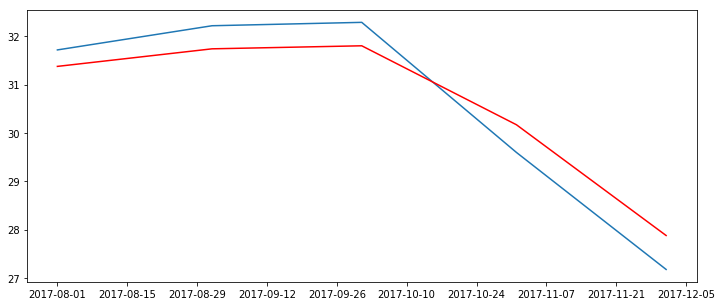

In [11]:
plt.figure(figsize=(12,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [12]:
total = 0
total_error = 0

for j in range(len(test)):
    total += test[j]
    total_error += abs(test[j]-predictions[j])
    
print("Accuracy = ", (total - total_error)*100/total)

Accuracy =  98.31549388790722
